In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, chi2_contingency, mannwhitneyu

In [65]:
pd.set_option('display.max_columns', None)

In [66]:
products_cf = pd.read_csv('coffeeOrdersDataset-products.csv')

In [67]:
cf = products_cf.copy()
cf_new = products_cf.copy()

In [68]:
#Check for any missing data
cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      48 non-null     object 
 1   Coffee Type     48 non-null     object 
 2   Roast Type      48 non-null     object 
 3   Size            48 non-null     float64
 4   Unit Price      48 non-null     float64
 5   Price per 100g  48 non-null     float64
 6   Profit          48 non-null     float64
dtypes: float64(4), object(3)
memory usage: 2.8+ KB


In [69]:
cf.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965
1,A-L-0.5,Ara,L,0.5,7.770,1.5540,0.69930
2,A-L-1,Ara,L,1.0,12.950,1.2950,1.16550
3,A-L-2.5,Ara,L,2.5,29.785,1.1914,2.68065
4,A-M-0.2,Ara,M,0.2,3.375,1.6875,0.30375


In [70]:
cf.columns

Index(['Product ID', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price',
       'Price per 100g', 'Profit'],
      dtype='object')

In [71]:
#Check for any duplicated values.
cf.duplicated().sum()

np.int64(0)

In [72]:
cf.describe

<bound method NDFrame.describe of    Product ID Coffee Type Roast Type  Size  Unit Price  Price per 100g  \
0     A-L-0.2         Ara          L   0.2       3.885          1.9425   
1     A-L-0.5         Ara          L   0.5       7.770          1.5540   
2       A-L-1         Ara          L   1.0      12.950          1.2950   
3     A-L-2.5         Ara          L   2.5      29.785          1.1914   
4     A-M-0.2         Ara          M   0.2       3.375          1.6875   
5     A-M-0.5         Ara          M   0.5       6.750          1.3500   
6       A-M-1         Ara          M   1.0      11.250          1.1250   
7     A-M-2.5         Ara          M   2.5      25.875          1.0350   
8     A-D-0.2         Ara          D   0.2       2.985          1.4925   
9     A-D-0.5         Ara          D   0.5       5.970          1.1940   
10      A-D-1         Ara          D   1.0       9.950          0.9950   
11    A-D-2.5         Ara          D   2.5      22.885          0.9154   
12  

In [73]:
#Import he other datasets
orders_cf = pd.read_csv('coffeeOrdersDataset-customers.csv')

In [74]:
ccf = orders_cf.copy()
ccf_new = orders_cf.copy()

In [75]:
ccf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       1000 non-null   object 
 1   Order Date     1000 non-null   object 
 2   Customer ID    1000 non-null   object 
 3   Product ID     1000 non-null   object 
 4   Quantity       1000 non-null   int64  
 5   Customer Name  0 non-null      float64
 6   Email          0 non-null      float64
 7   Country        0 non-null      float64
 8   Coffee Type    0 non-null      float64
 9   Roast Type     0 non-null      float64
 10  Size           0 non-null      float64
 11  Unit Price     0 non-null      float64
 12  Sales          0 non-null      float64
dtypes: float64(8), int64(1), object(4)
memory usage: 101.7+ KB


In [76]:
ccf.columns

Index(['Order ID', 'Order Date', 'Customer ID', 'Product ID', 'Quantity',
       'Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type',
       'Size', 'Unit Price', 'Sales'],
      dtype='object')

In [77]:
#Drop the extra colums with no data
null_columns=['Customer Name', 'Email', 'Country', 'Coffee Type', 'Roast Type', 'Size', 'Unit Price','Sales']
ccf.drop(columns=null_columns, inplace= True)
ccf

,Order ID,Order Date,Customer ID,Product ID,Quantity
0,QEV-37451-860,9/5/2019,17670-51384-MA,R-M-1,2
1,QEV-37451-860,9/5/2019,17670-51384-MA,E-M-0.5,5
2,FAA-43335-268,6/17/2021,21125-22134-PX,A-L-1,1
3,KAC-83089-793,7/15/2021,23806-46781-OU,E-M-1,2
4,KAC-83089-793,7/15/2021,23806-46781-OU,R-L-2.5,2
...,...,...,...,...,...
995,RLM-96511-467,1/6/2020,43014-53743-XK,R-L-2.5,1
996,AEZ-13242-456,5/4/2022,62494-09113-RP,R-M-0.5,5
997,UME-75640-698,10/11/2019,62494-09113-RP,A-M-0.5,4
998,GJC-66474-557,8/3/2021,64965-78386-MY,A-D-1,1


In [78]:
#Check for duplicates
ccf.duplicated().sum()

np.int64(0)

In [79]:
#Import the last data set
customer_cf = pd.read_csv('coffeeOrdersDataset-customers_id.csv')

In [80]:
cif = customer_cf.copy()
cif_new = customer_cf.copy()

In [81]:
cif.info()
#The missing values of email and phone number are not relevant in our data set, so no need to fill in.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Customer ID     1000 non-null   object
 1   Customer Name   1000 non-null   object
 2   Email           796 non-null    object
 3   Phone Number    870 non-null    object
 4   Address Line 1  1000 non-null   object
 5   City            1000 non-null   object
 6   Country         1000 non-null   object
 7   Postcode        1000 non-null   object
 8   Loyalty Card    1000 non-null   object
dtypes: object(9)
memory usage: 70.4+ KB


In [82]:
cif.columns

Index(['Customer ID', 'Customer Name', 'Email', 'Phone Number',
       'Address Line 1', 'City', 'Country', 'Postcode', 'Loyalty Card'],
      dtype='object')

In [83]:
cif.duplicated().sum()

np.int64(0)

In [84]:
cif.Country.value_counts()

Country
United States     782
Ireland           150
United Kingdom     68
Name: count, dtype: int64

In [85]:
merged_cf=products_cf.merge(orders_cf[['Order ID', 'Order Date', 'Customer ID', 'Product ID', 'Quantity']], on= 'Product ID')
merged_cf.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Order ID,Order Date,Customer ID,Quantity
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,VMW-26889-781,6/28/2019,36078-91009-WU,2
1,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,FJQ-60035-234,4/5/2021,08847-29858-HN,2
2,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,TKL-20738-660,10/2/2021,47939-53158-LS,1
3,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,LOO-35324-159,5/19/2020,68412-11126-YJ,4
4,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,MDC-03318-645,4/30/2022,43974-44760-QI,2


In [86]:
final_cf=merged_cf.merge(customer_cf[['Customer ID','City', 'Country', 'Loyalty Card']],  on= 'Customer ID')
final_cf.head()

,Product ID,Coffee Type,Roast Type,Size,Unit Price,Price per 100g,Profit,Order ID,Order Date,Customer ID,Quantity,City,Country,Loyalty Card
0,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,VMW-26889-781,6/28/2019,36078-91009-WU,2,San Bernardino,United States,Yes
1,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,FJQ-60035-234,4/5/2021,08847-29858-HN,2,Stockton,United States,Yes
2,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,TKL-20738-660,10/2/2021,47939-53158-LS,1,Nashville,United States,No
3,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,LOO-35324-159,5/19/2020,68412-11126-YJ,4,Washington,United States,Yes
4,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,MDC-03318-645,4/30/2022,43974-44760-QI,2,New York City,United States,No


In [87]:
final_cf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product ID      1000 non-null   object 
 1   Coffee Type     1000 non-null   object 
 2   Roast Type      1000 non-null   object 
 3   Size            1000 non-null   float64
 4   Unit Price      1000 non-null   float64
 5   Price per 100g  1000 non-null   float64
 6   Profit          1000 non-null   float64
 7   Order ID        1000 non-null   object 
 8   Order Date      1000 non-null   object 
 9   Customer ID     1000 non-null   object 
 10  Quantity        1000 non-null   int64  
 11  City            1000 non-null   object 
 12  Country         1000 non-null   object 
 13  Loyalty Card    1000 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


In [88]:
final_cf.duplicated().sum()

np.int64(0)

In [89]:
final_cf.rename(columns = {'Product ID':'product_id', 'Coffee Type':'coffee_type','Roast Type':'roast_type', 'Unit Price':'unit_price', 'Order ID':'order_id','Order Date':'order_date', 'Customer ID': 'customer_id', 'Loyalty Card':'loyalty_card'}, inplace = True)

In [90]:
final_cf.columns

Index(['product_id', 'coffee_type', 'roast_type', 'Size', 'unit_price',
       'Price per 100g', 'Profit', 'order_id', 'order_date', 'customer_id',
       'Quantity', 'City', 'Country', 'loyalty_card'],
      dtype='object')

In [91]:
#Since the dats is clean, data analysis can begin
#Hypothesis 1: Customers from the United States of America place more frequent coffee orders than customers from other countries.
final_cf.groupby('Country').Quantity.value_counts()

Country         Quantity
Ireland         3            33
                6            28
                4            27
                2            25
                1            22
                5            18
United Kingdom  2            15
                4            13
                6            13
                1            11
                3            11
                5            10
United States   2           145
                5           134
                6           134
                3           130
                4           125
                1           106
Name: count, dtype: int64

In [94]:
orders_by_country = final_cf['Country'].value_counts()
orders_by_country.head()

Country
United States     774
Ireland           153
United Kingdom     73
Name: count, dtype: int64

In [95]:
usa_orders = orders_by_country.get('United States', 0)
usa_orders

np.int64(774)

In [96]:
europe_orders = orders_by_country[orders_by_country.index.isin(['Ireland', 'United Kingdom'])].sum()
europe_orders

np.int64(226)

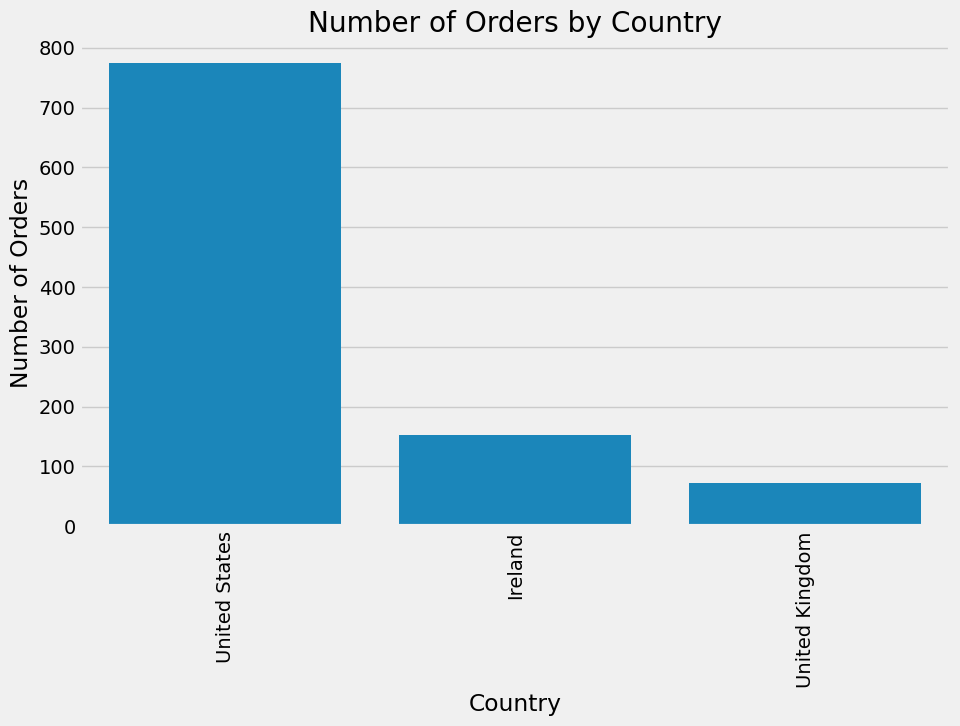

In [97]:
plt.figure(figsize=(10, 6))
ax=sns.countplot(x='Country', data=final_cf, order=final_cf['Country'].value_counts().index, )
plt.title('Number of Orders by Country')
ax.set_xlabel("Country")  # X-axis label
ax.set_ylabel("Number of Orders")  # Y-axis label
plt.xticks(rotation=90)
plt.show()

In [99]:
usa = final_cf[final_cf['Country'] == 'United States']
europe = final_cf[final_cf['Country'].isin(['Ireland', 'United Kingdom'])]  # Add other European countries if available




In [100]:
usa_orders_per_customer = usa.groupby('customer_id')['order_id'].count()
europe_orders_per_customer = europe.groupby('customer_id')['order_id'].count()
t_stat, p_val = ttest_ind(usa_orders_per_customer, europe_orders_per_customer)
print(f"Hypothesis 1: t-statistic={t_stat}, p-value={p_val}")

Hypothesis 1: t-statistic=-0.995442493639107, p-value=0.3197854244254476


In [101]:
#Hypothesis 2: Certain coffee types are more popular in specific countries due to cultural preferences.
final_cf.groupby('Country').coffee_type.value_counts()

Country         coffee_type
Ireland         Ara             41
                Lib             39
                Rob             38
                Exc             35
United Kingdom  Exc             23
                Rob             22
                Lib             21
                Ara              7
United States   Ara            216
                Exc            189
                Lib            188
                Rob            181
Name: count, dtype: int64

In [102]:
final_cf.groupby('Country').coffee_type.value_counts(normalize=True)

Country         coffee_type
Ireland         Ara            0.267974
                Lib            0.254902
                Rob            0.248366
                Exc            0.228758
United Kingdom  Exc            0.315068
                Rob            0.301370
                Lib            0.287671
                Ara            0.095890
United States   Ara            0.279070
                Exc            0.244186
                Lib            0.242894
                Rob            0.233850
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1473dbcf490>,
 [Text(0.7036402761305484, 0.8455118933562827, 'Exc: Excelsa'),
  Text(-0.8946188040628875, 0.6400446823598248, 'Ara: Arabica'),
  Text(-0.6758193888433529, -0.8679102221217336, 'Rob: Robusta'),
  Text(0.816263194085768, -0.7373699193626629, 'Lib: Liberica')],
 [Text(0.38380378698029904, 0.46118830546706324, '27.9%'),
  Text(-0.48797389312521133, 0.34911528128717717, '24.4%'),
  Text(-0.36862875755091973, -0.47340557570276376, '24.3%'),
  Text(0.44523446950132795, -0.4022017741978161, '23.4%')])

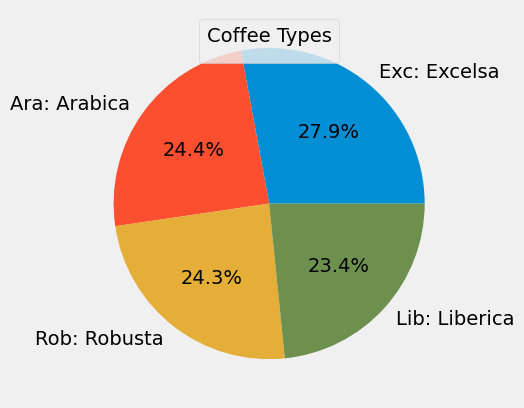

In [103]:
type=usa.coffee_type.value_counts(normalize= True)
coffee_type=type.index
coffee_labels = ['Exc: Excelsa', 'Ara: Arabica', 'Rob: Robusta', 
                 'Lib: Liberica']
plt.legend(labels=coffee_labels, title= 'Coffee Types', loc="upper center")
plt.pie(type, labels= coffee_labels,autopct='%1.1f%%') 

([<matplotlib.patches.Wedge at 0x1473dbb6290>,
 [Text(0.7390688500750576, 0.814725251142207, 'Exc: Excelsa'),
  Text(-0.8826735554312363, 0.6564201356923632, 'Ara: Arabica'),
  Text(-0.5935353434255041, -0.9261294704871286, 'Rob: Robusta'),
  Text(0.8640852322017702, -0.6807031008382531, 'Lib: Liberica')],
 [Text(0.4031284636773041, 0.4443955915321129, '26.5%'),
  Text(-0.4814583029624925, 0.35804734674128896, '26.5%'),
  Text(-0.32374655095936583, -0.5051615293566155, '25.7%'),
  Text(0.4713192175646019, -0.37129260045722895, '21.2%')])

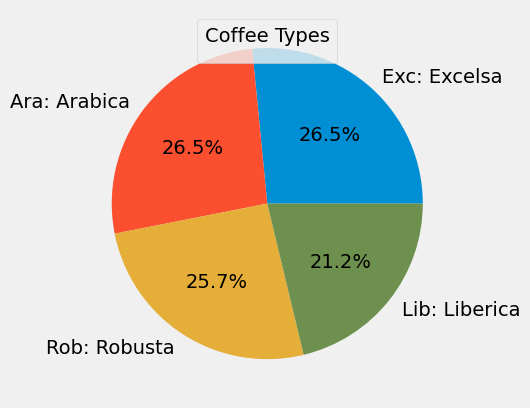

In [104]:
type=europe.coffee_type.value_counts(normalize= True)
coffee_type=type.index
coffee_labels = ['Exc: Excelsa', 'Ara: Arabica', 'Rob: Robusta', 
                 'Lib: Liberica']
plt.legend(labels=coffee_labels, title= 'Coffee Types', loc="upper center")
plt.pie(type, labels= coffee_labels,autopct='%1.1f%%') 

In [105]:
coffee_type_country = pd.crosstab(final_cf['coffee_type'], final_cf['Country'])
chi2, p_val, dof, ex = chi2_contingency(coffee_type_country)
print(f"Hypothesis 2: chi2={chi2}, p-value={p_val}")


Hypothesis 2: chi2=11.966390543316768, p-value=0.06272280377160865


In [143]:
repeat_orders=final_cf['customer_id'].value_counts()
repeat_orders


customer_id
86579-92122-OC    7
16982-35708-BZ    5
66458-91190-YC    5
94091-86957-HX    5
22721-63196-UJ    4
                 ..
67423-10113-LM    1
84466-22864-CE    1
09818-59895-EH    1
14121-20527-OJ    1
44530-75983-OD    1
Name: count, Length: 913, dtype: int64

In [107]:
final_cf['order_date'] = pd.to_datetime(final_cf['order_date'])


In [108]:

# Define regions for comparison
usa = final_cf[final_cf['Country'] == 'United States']
europe = final_cf[final_cf['Country'].isin(['Ireland', 'United Kingdom'])]


In [109]:

# Display summary statistics for the USA and Europe regions
print("\nSummary statistics for USA:")
print(usa.describe())
print("\nSummary statistics for Europe:")
print(europe.describe())



Summary statistics for USA:
             Size  unit_price  Price per 100g      Profit  \
count  774.000000  774.000000      774.000000  774.000000   
mean     1.045866   13.005859        1.436841    1.308468   
min      0.200000    2.685000        0.823400    0.161100   
25%      0.500000    5.370000        1.191400    0.505050   
50%      0.500000    8.950000        1.366200    0.980100   
75%      2.500000   20.585000        1.650000    1.683500   
max      2.500000   36.455000        2.377500    4.739150   
std      0.889221    9.815379        0.361794    1.126471   

                          order_date    Quantity  
count                            774  774.000000  
mean   2020-11-12 01:34:53.023255808    3.565891  
min              2019-01-02 00:00:00    1.000000  
25%              2019-12-30 00:00:00    2.000000  
50%              2020-12-03 12:00:00    4.000000  
75%              2021-10-04 00:00:00    5.000000  
max              2022-08-19 00:00:00    6.000000  
std          

In [112]:
usa = final_cf[final_cf['Country'] == 'United States']
ireland= final_cf[final_cf['Country'].isin(['Ireland'])]
uk= final_cf[final_cf['Country'].isin(['United States'])]

In [113]:
#Testing for larger order size per order
usa_order_size = usa['Size']
europe_order_size = europe['Size']
t_stat, p_val = ttest_ind(usa_order_size, europe_order_size)
print(f"Hypothesis 3: t-statistic={t_stat}, p-value={p_val}")


Hypothesis 3: t-statistic=0.5668440665030134, p-value=0.5709475887392328


In [114]:
#hypothesis 3:  Customers from  the United States of America tend to place larger orders (more items per order) than customers from Countries  in Europe.
usa_order_size = usa['Quantity']
ireland_order_size = ireland['Quantity']
uk_order_size = uk['Quantity']
t_stat, p_val = ttest_ind(usa_order_size, europe_order_size)
print(f"Hypothesis 3: t-statistic={t_stat}, p-value={p_val}")


Hypothesis 3: t-statistic=22.012167991740185, p-value=7.564921017300367e-88


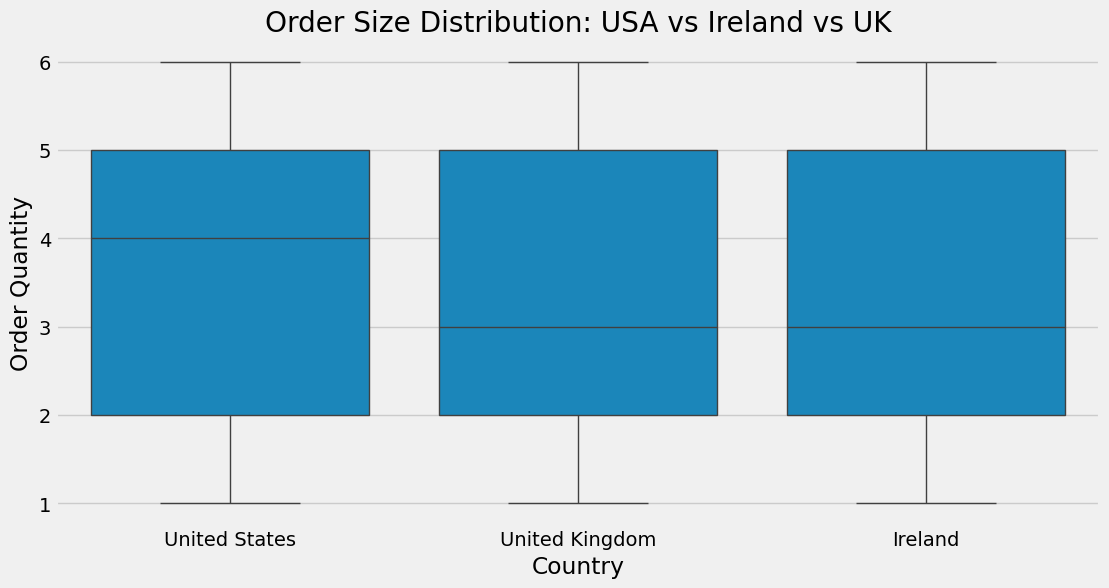

In [115]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Quantity', data=final_cf)
plt.title('Order Size Distribution: USA vs Ireland vs UK')
plt.xlabel('Country')
plt.ylabel('Order Quantity')
plt.show()


In [116]:
#Hypothesis 4: Customers that applied for Loyalty cards did more purchases than those that did not
final_cf['loyalty_card'] =final_cf['loyalty_card'].replace({'Yes': 'True', 'No': 'False'})

In [117]:
final_cf.loyalty_card.value_counts()

loyalty_card
False    521
True     479
Name: count, dtype: int64

In [118]:
final_cf[final_cf.loyalty_card== 'False']

,product_id,coffee_type,roast_type,Size,unit_price,Price per 100g,Profit,order_id,order_date,customer_id,Quantity,City,Country,loyalty_card
2,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,TKL-20738-660,2021-10-02,47939-53158-LS,1,Nashville,United States,False
4,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,MDC-03318-645,2022-04-30,43974-44760-QI,2,New York City,United States,False
8,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,EIP-19142-462,2021-09-06,60973-72562-DQ,1,Santa Ana,United States,False
9,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,QTC-71005-730,2021-09-02,14298-02150-KH,4,San Francisco,United States,False
10,A-L-0.2,Ara,L,0.2,3.885,1.9425,0.34965,GUU-40666-525,2021-11-24,68555-89840-GZ,3,Seattle,United States,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,E-D-2.5,Exc,D,2.5,27.945,1.1178,3.07395,WTV-24996-658,2020-10-23,57837-15577-YK,3,Manorhamilton,Ireland,False
991,E-D-2.5,Exc,D,2.5,27.945,1.1178,3.07395,UHW-74617-126,2022-02-16,90816-65619-LM,2,Cleveland,United States,False
993,E-D-2.5,Exc,D,2.5,27.945,1.1178,3.07395,BQJ-44755-910,2020-02-28,75006-89922-VW,6,Evansville,United States,False
995,E-D-2.5,Exc,D,2.5,27.945,1.1178,3.07395,NJR-03699-189,2019-10-08,95152-82155-VQ,1,Austin,United States,False


In [164]:
loyalty_orders = final_cf[final_cf['loyalty_card'] == 'True'].groupby('customer_id')['order_id'].count()
non_loyalty_orders = final_cf[final_cf['loyalty_card'] == 'False'].groupby('customer_id')['order_id'].count()
t_stat, p_val = ttest_ind(loyalty_orders, non_loyalty_orders)
print(f"Hypothesis 4 (orders): t-statistic={t_stat}, p-value={p_val}")

Hypothesis 4 (orders): t-statistic=-0.8769701255114766, p-value=0.3807340618400762


In [120]:
non_loyalty_orders.value_counts(normalize=True)

order_id
1    0.934043
2    0.040426
3    0.012766
4    0.008511
5    0.004255
Name: proportion, dtype: float64

In [177]:
values=non_loyalty_orders.value_counts(normalize=True)
regions=values.index

Text(0.5, 1.0, 'Number of orders made by non-loyal customers')

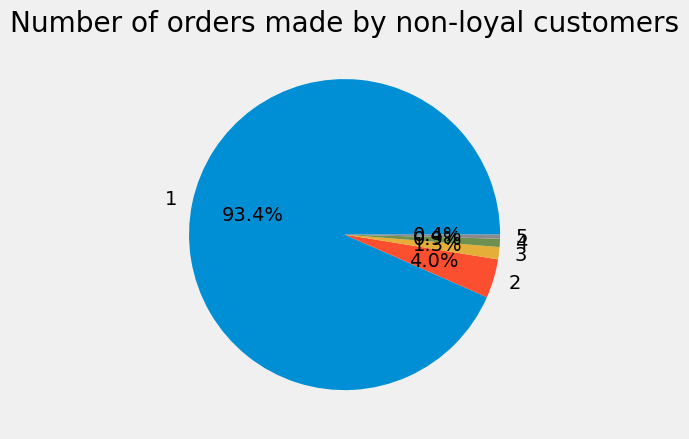

In [179]:

plt.pie(values, labels=regions, autopct='%1.1f%%')
plt.title('Number of orders made by non-loyal customers')

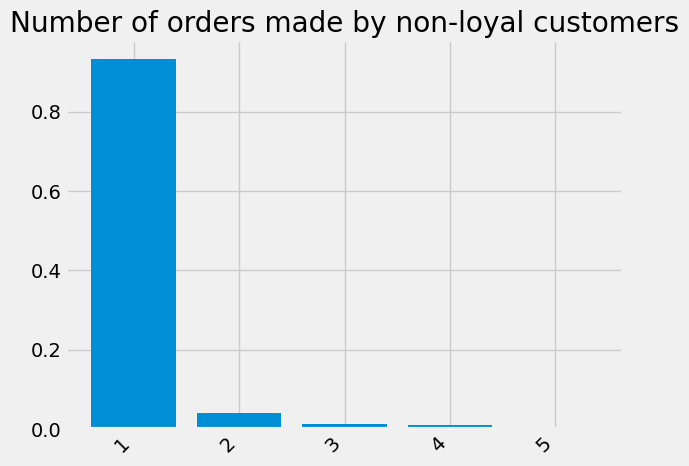

In [189]:
plt.bar(values.index, values)
plt.title('Number of orders made by non-loyal customers')
plt.xticks(rotation=45, ha= 'right');

In [183]:
loyalty_orders.value_counts(normalize=True)

order_id
1    0.952596
2    0.033860
4    0.006772
3    0.002257
5    0.002257
7    0.002257
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Number of orders made by loyal customers')

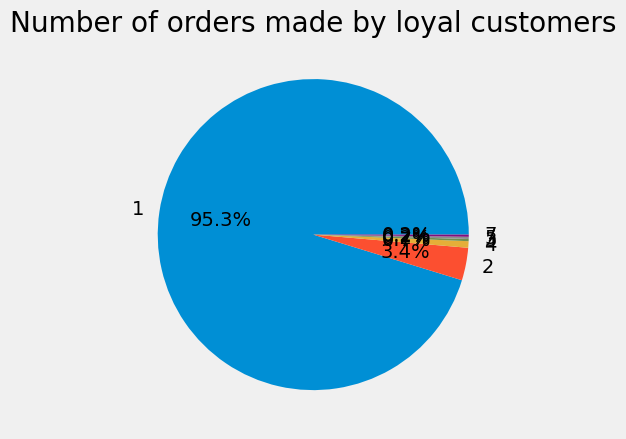

In [191]:
objects=loyalty_orders.value_counts(normalize=True)
regions=objects.index
plt.pie(objects, labels=regions, autopct='%1.1f%%')
plt.title('Number of orders made by loyal customers')

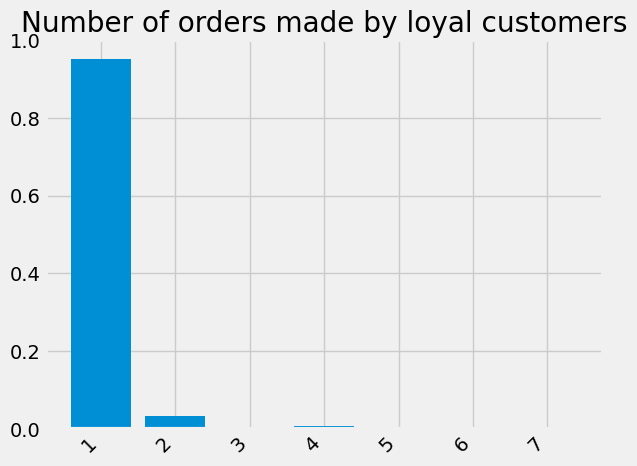

In [192]:
plt.bar(objects.index, objects)
plt.title('Number of orders made by loyal customers')
plt.xticks(rotation=45, ha= 'right');

In [195]:
#Hypothesis 5:Are orders likely to be made on weekdays or the weekend?
final_cf['order_date'] = pd.to_datetime(final_cf['order_date'])
final_cf['day_of_week'] = final_cf['order_date'].dt.dayofweek  # Monday=0, Sunday=6
final_cf['hour'] = final_cf['order_date'].dt.hour

# Categorize time into morning (6-11), afternoon (12-17), evening (18-23), night (0-5)
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'

final_cf['time_of_day'] = final_cf['hour'].apply(time_of_day)


In [196]:
final_cf['day_of_week'] =final_cf['day_of_week'].replace({'0': 'Monday', '1': 'Tuesday', '2': 'Wednesday', '3': 'Thursday','4':'Friday','5': 'Saturday','6':'Sunday'})

In [197]:
order_days=final_cf.groupby('day_of_week')['Size'].count()
print(final_cf.groupby('time_of_day')['Size'].mean())
order_days


time_of_day
night    1.0373
Name: Size, dtype: float64


day_of_week
0    137
1    145
2    142
3    143
4    159
5    134
6    140
Name: Size, dtype: int64

In [198]:
order_value=final_cf.groupby('day_of_week')['Country'].value_counts(normalize=True)
order_value

day_of_week  Country       
0            United States     0.832117
             Ireland           0.109489
             United Kingdom    0.058394
1            United States     0.772414
             Ireland           0.158621
             United Kingdom    0.068966
2            United States     0.683099
             Ireland           0.204225
             United Kingdom    0.112676
3            United States     0.797203
             Ireland           0.132867
             United Kingdom    0.069930
4            United States     0.735849
             Ireland           0.188679
             United Kingdom    0.075472
5            United States     0.835821
             Ireland           0.126866
             United Kingdom    0.037313
6            United States     0.771429
             Ireland           0.142857
             United Kingdom    0.085714
Name: proportion, dtype: float64

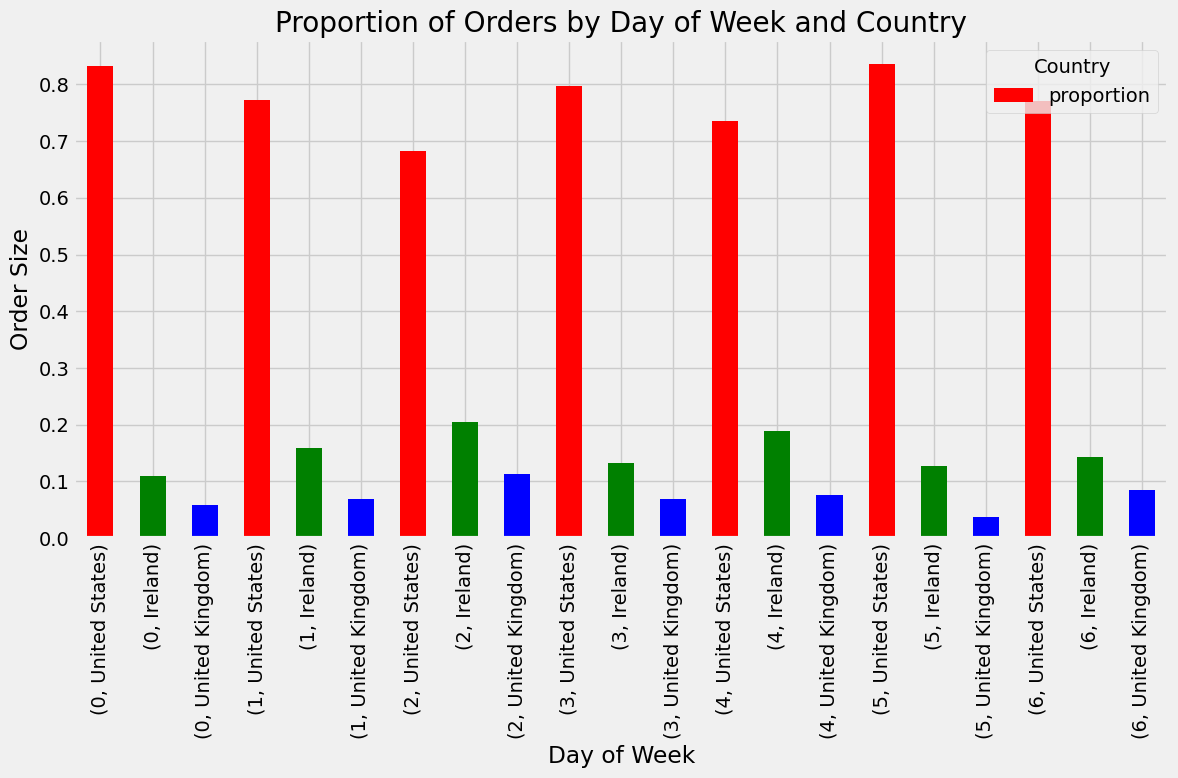

In [203]:
color_mapping = ['red', 'green', 'blue']
order_value.plot(kind='bar', figsize=(12, 8), color=color_mapping)
plt.title('Proportion of Orders by Day of Week and Country')
plt.xlabel('Day of Week')
plt.ylabel('Order Size')
plt.legend(title='Country', bbox_to_anchor=(1, 1), loc='upper right')#, color={"United States": "red", "Ireland": "green", "United Kingdom": "blue"}
plt.tight_layout()
plt.show()

In [ ]:
day=order_value.value_counts()
days=day.index

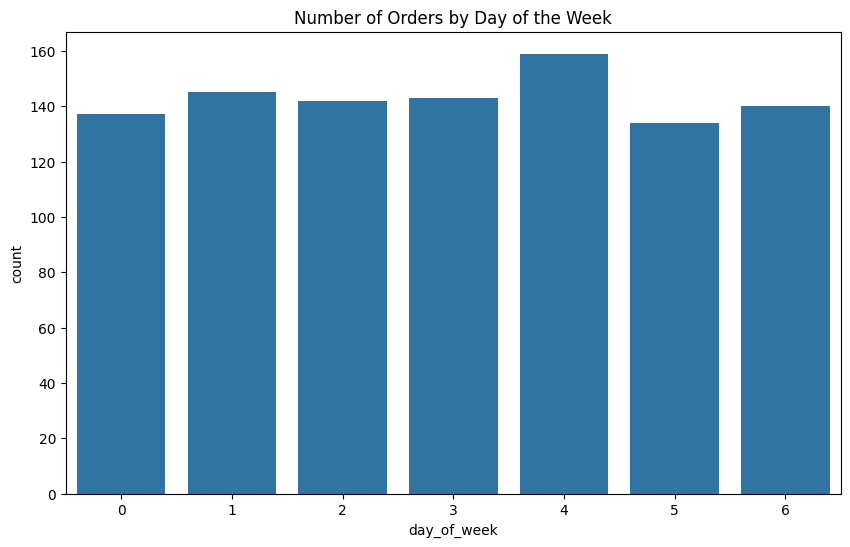

In [ ]:

# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=final_cf)
plt.title('Number of Orders by Day of the Week')
plt.show()
